In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo, list_available_datasets
from sklearn.model_selection import train_test_split

In [6]:

data = pd.read_csv('./wine+quality/winequality-red.csv',sep=";")

In [7]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [8]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]

print("Feature list:", feature_list)
print("Label: ", label)


Feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label:  ['quality']


In [9]:
data.info()#data stastics
#quality is label

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
data.describe()
# stat about each feature or each column

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [11]:
data['quality'].value_counts()
#higher quality ---> better quality

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Text(0, 0.5, 'count')

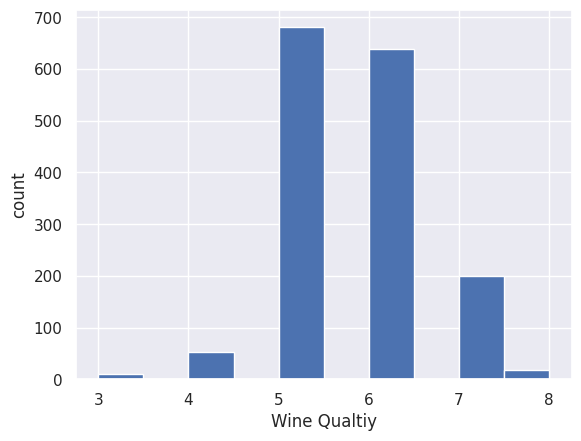

In [12]:
sns.set() # ploting library
data.quality.hist()
plt.xlabel('Wine Qualtiy')
plt.ylabel('count')

In [13]:
# features are at different scales


In [14]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    
    #shuffe dataset
    shuffled_indices = np.random.permutation(len(data))
    
    #calculate the size of test data
    test_set_size = int(len(data)*test_ratio)
    
    #split data into training and test sets.
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices],data.iloc[test_indices]

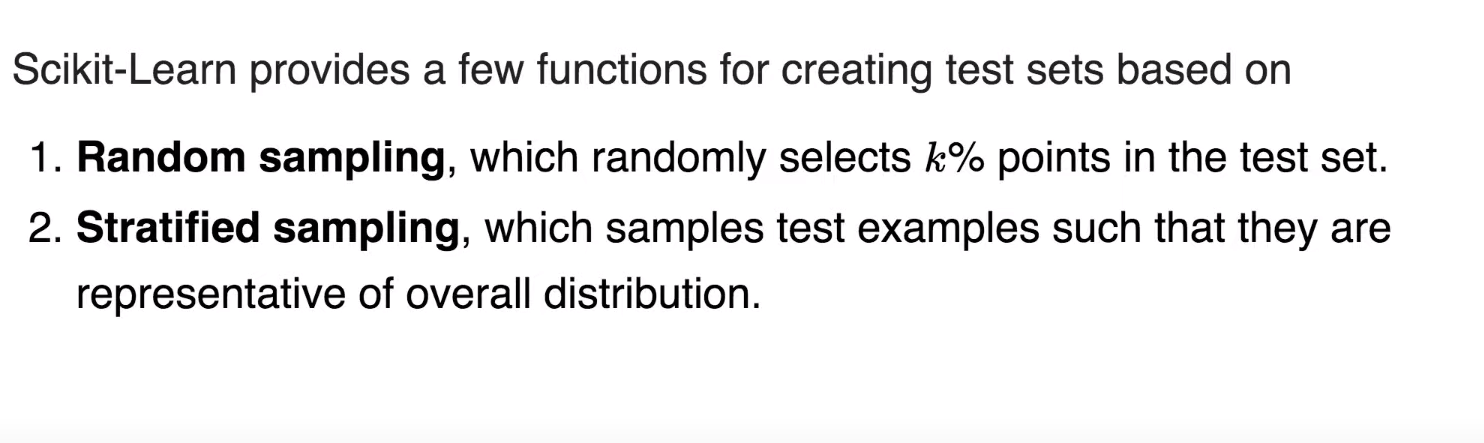


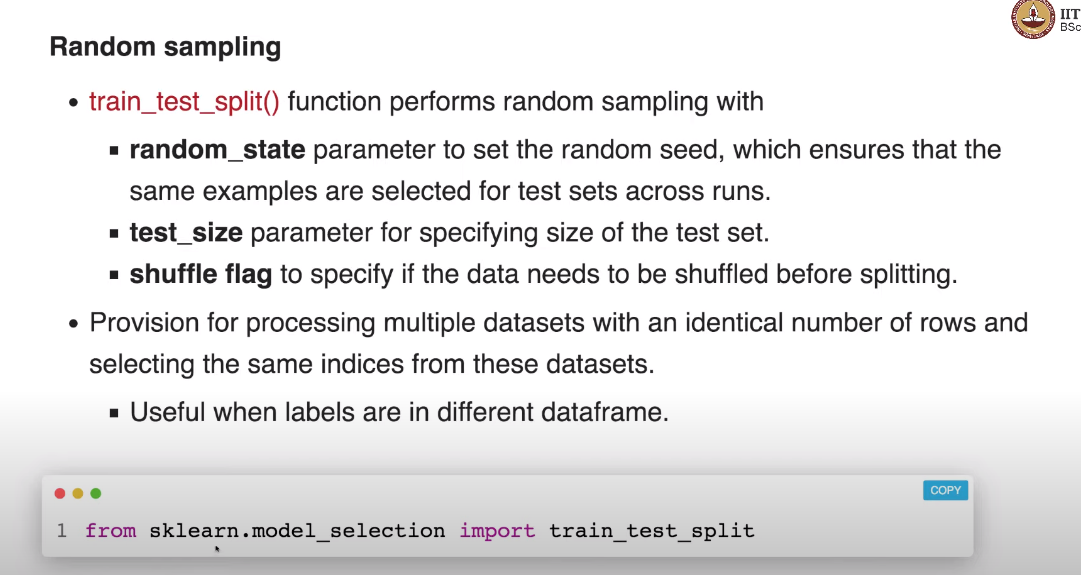

to read documentation 
    ?train_test_split

In [15]:
#random split examples
train_set, test_set = train_test_split(data, test_size=0.2,random_state=42)

#stratified sampling when data isnot uniform for example in above cases the wine 5 and 6 are of different distributions
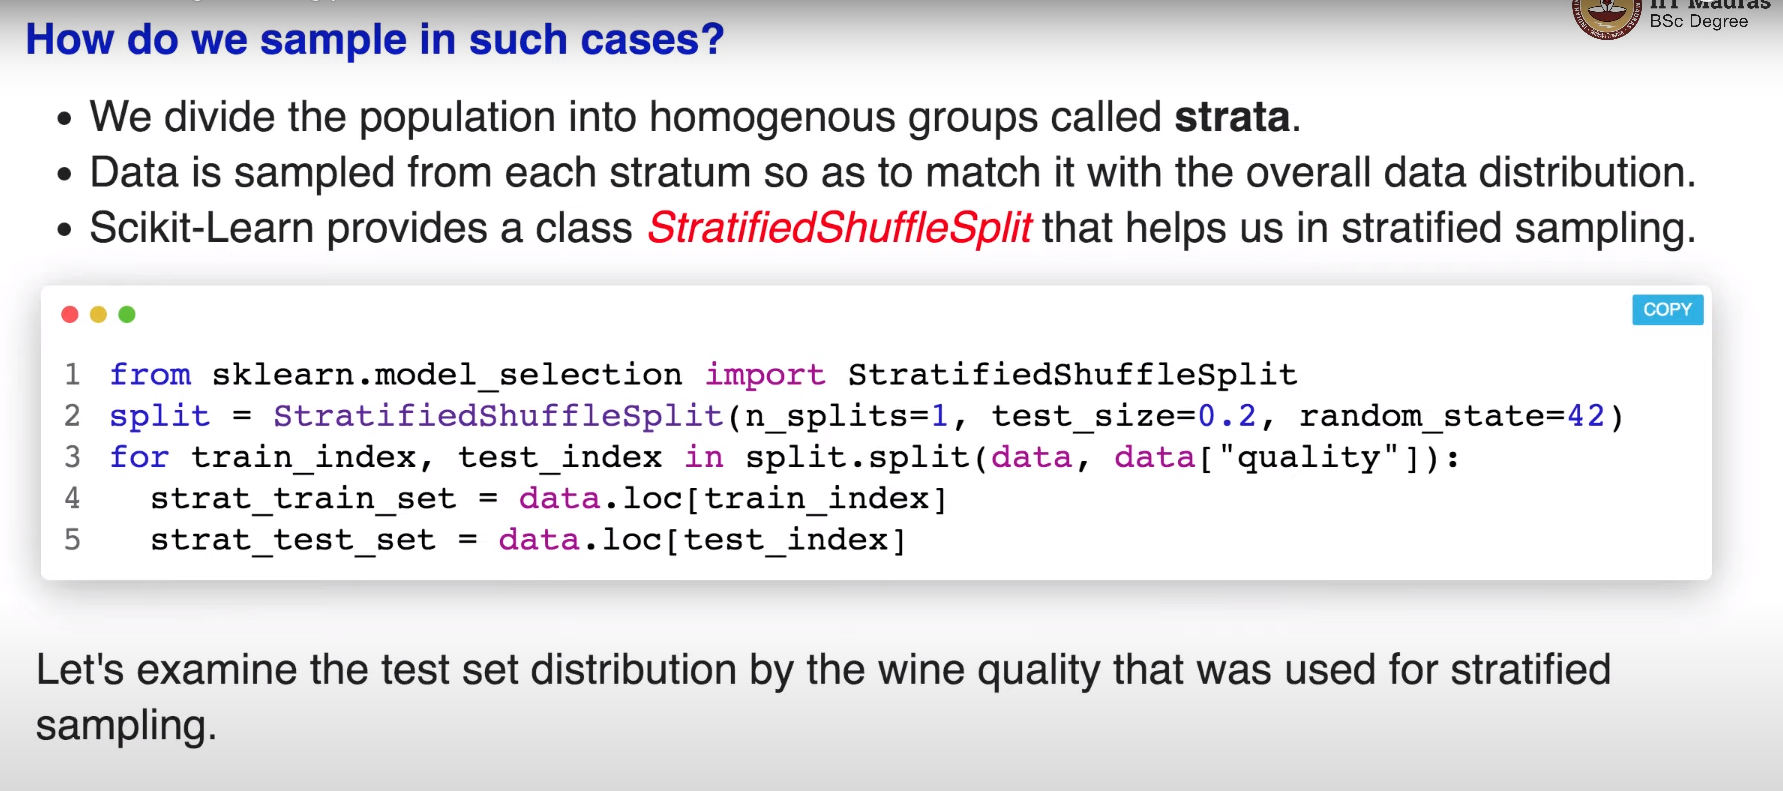

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data["quality"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

<Axes: xlabel='fixed acidity', ylabel='density'>

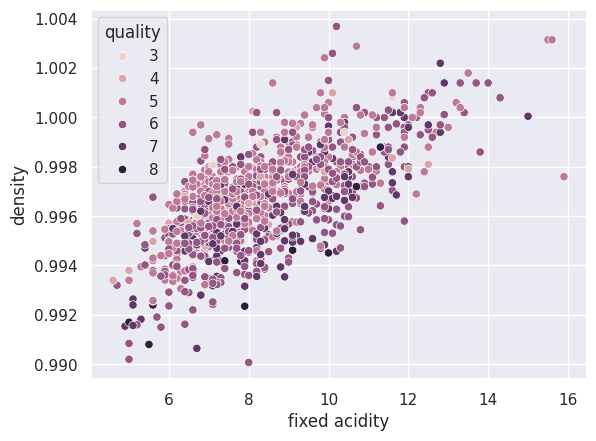

In [17]:
#scatter visulatisation
exploration_set = strat_train_set.copy()
sns.scatterplot(x='fixed acidity',y='density',hue='quality',data=exploration_set)

<Axes: xlabel='fixed acidity', ylabel='density'>

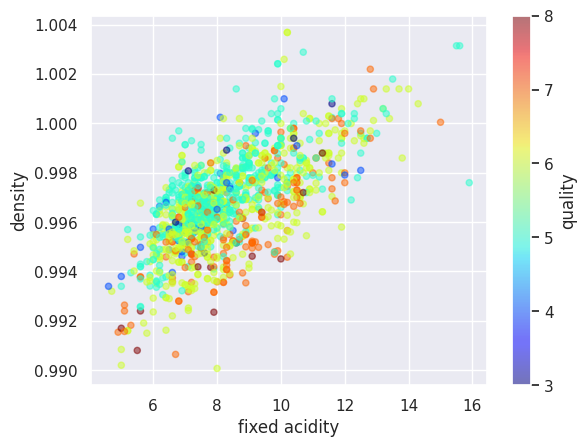

In [18]:
#using matplotlib
exploration_set.plot(kind='scatter',x='fixed acidity', y='density',alpha=0.5,c = "quality",cmap = plt.get_cmap('jet'))


strong corlation between featres



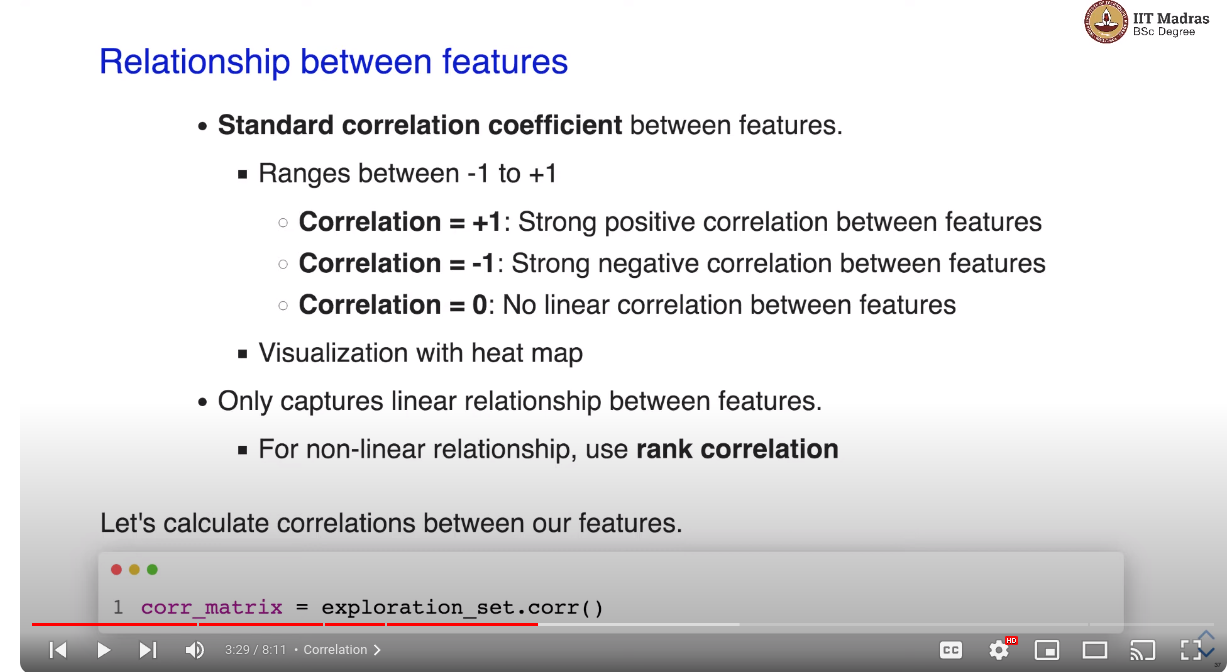

In [19]:
corr_matrix = exploration_set.corr()

In [20]:
corr_matrix['quality'] # checking corelation of labe with others
#alchol is strong positively corelated

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

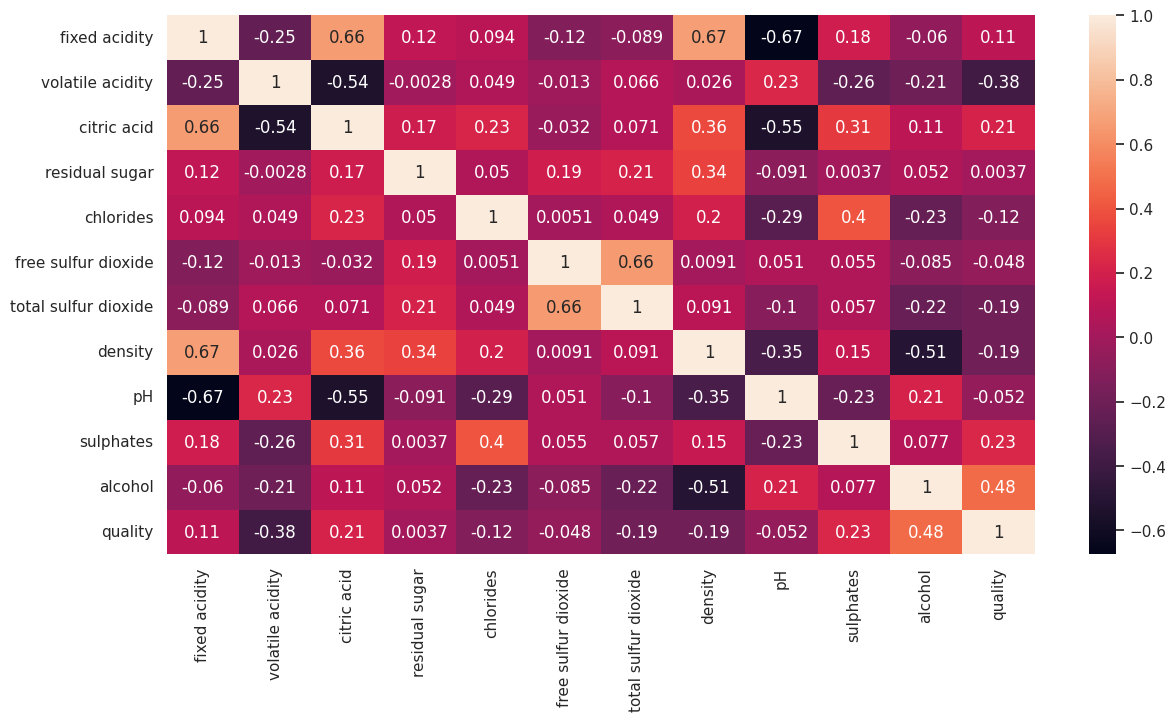

In [21]:
# crelation with heat map
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)
#darker negative loghter positive corelation

array([[<Axes: xlabel='citric acid', ylabel='citric acid'>,
        <Axes: xlabel='pH', ylabel='citric acid'>,
        <Axes: xlabel='alcohol', ylabel='citric acid'>,
        <Axes: xlabel='sulphates', ylabel='citric acid'>,
        <Axes: xlabel='quality', ylabel='citric acid'>],
       [<Axes: xlabel='citric acid', ylabel='pH'>,
        <Axes: xlabel='pH', ylabel='pH'>,
        <Axes: xlabel='alcohol', ylabel='pH'>,
        <Axes: xlabel='sulphates', ylabel='pH'>,
        <Axes: xlabel='quality', ylabel='pH'>],
       [<Axes: xlabel='citric acid', ylabel='alcohol'>,
        <Axes: xlabel='pH', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='sulphates', ylabel='alcohol'>,
        <Axes: xlabel='quality', ylabel='alcohol'>],
       [<Axes: xlabel='citric acid', ylabel='sulphates'>,
        <Axes: xlabel='pH', ylabel='sulphates'>,
        <Axes: xlabel='alcohol', ylabel='sulphates'>,
        <Axes: xlabel='sulphates', ylabel='sulphates'>,
  

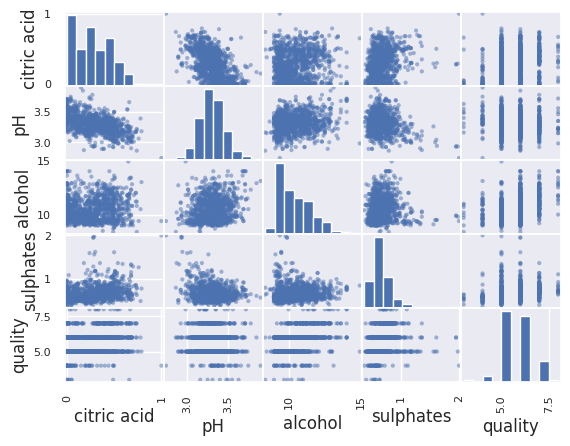

In [22]:
# another way to do is usig scatter matrix
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid','pH', 'alcohol','sulphates','quality']
scatter_matrix(exploration_set[attribute_list])
# dig shows dist histogram

In [24]:
#copy all features leaving aside the label
wine_features = strat_train_set.drop('quality',axis=1)

#copy all label list
wine_labels = strat_train_set['quality'].copy() 


In [25]:
wine_features.isna().sum()
#counts the number of NaN in each column of wine_features

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [26]:
# if we have missing value we can fill this up with median from Imputer class

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [27]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

# to see median value of each feature
imputer.statistics_

In [29]:
# to cross check
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [31]:
# to transfer training set to replace missing value to medians
tr_features = imputer.transform(wine_features)

In [32]:
tr_features.shape # this returns numpy we can convert numpy to --> data frame

(1279, 11)

In [33]:
wine_features_tr = pd.DataFrame(tr_features,columns=wine_features.columns)

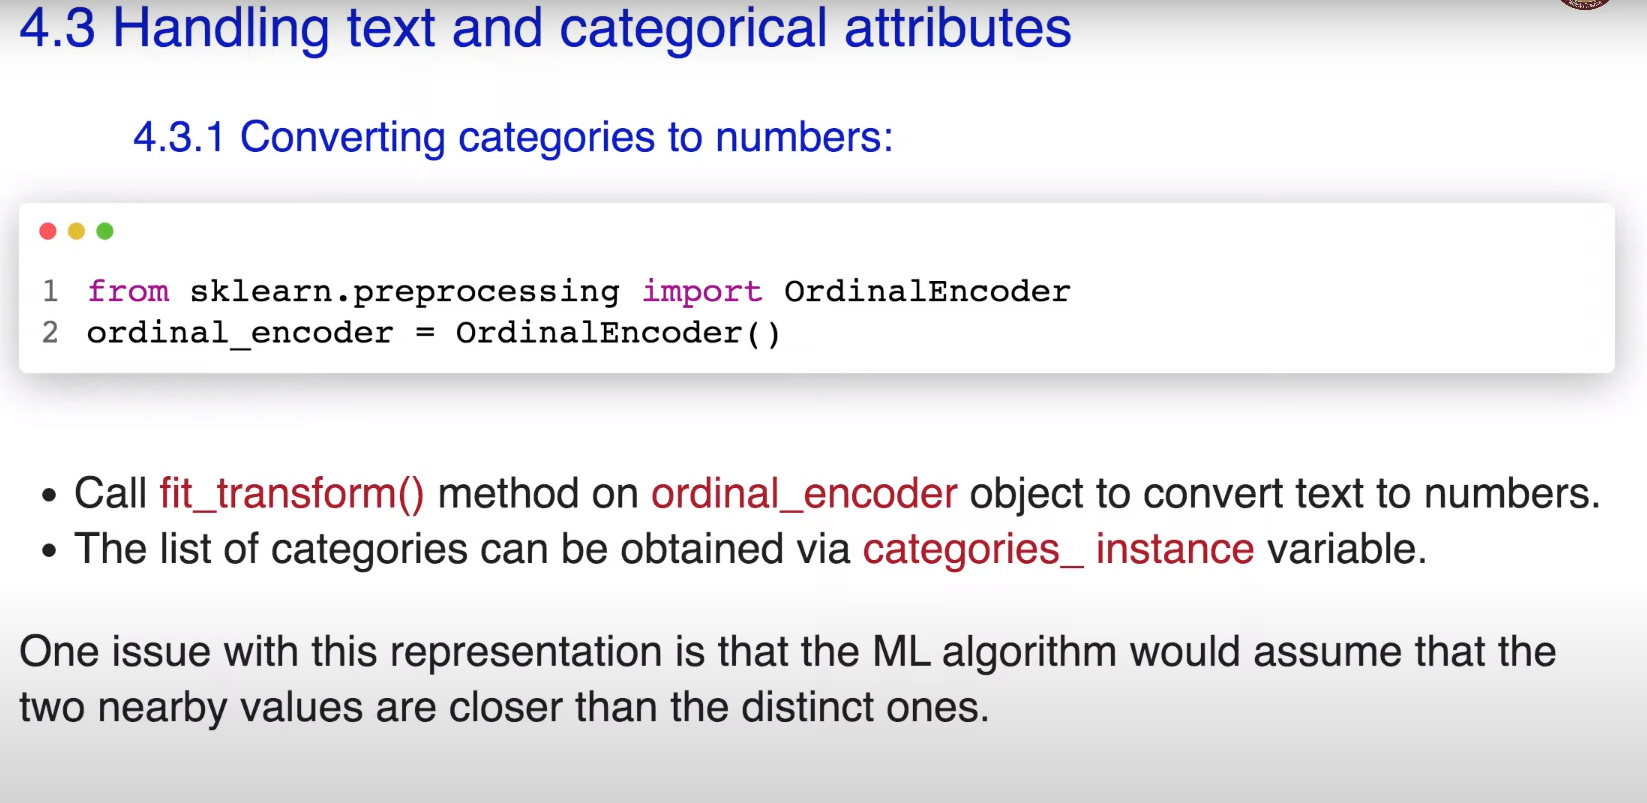
 

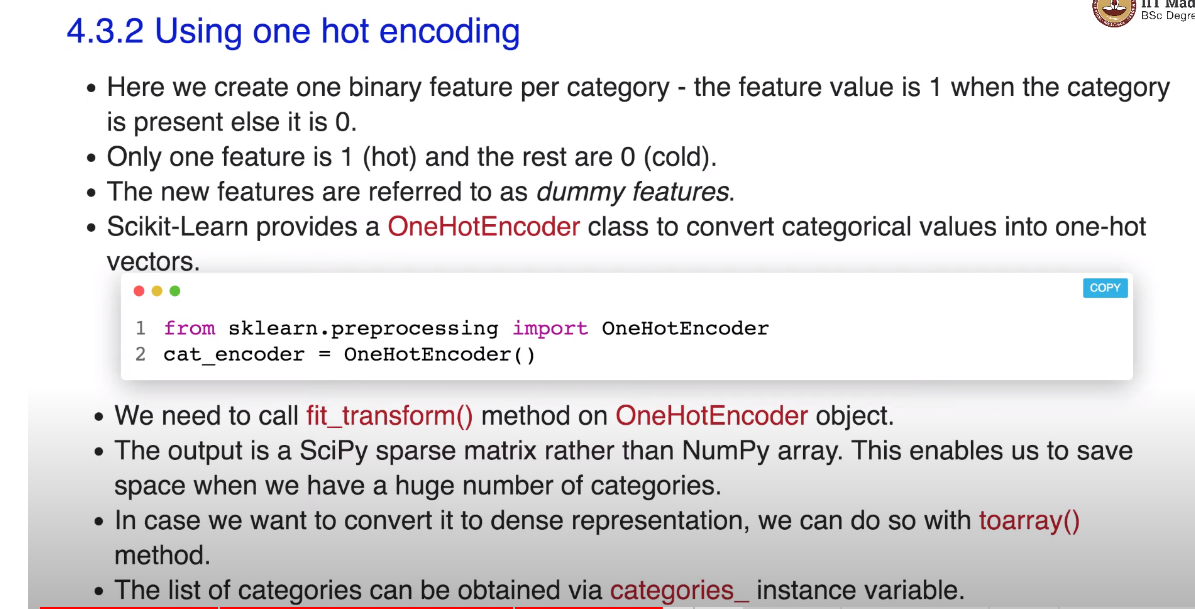

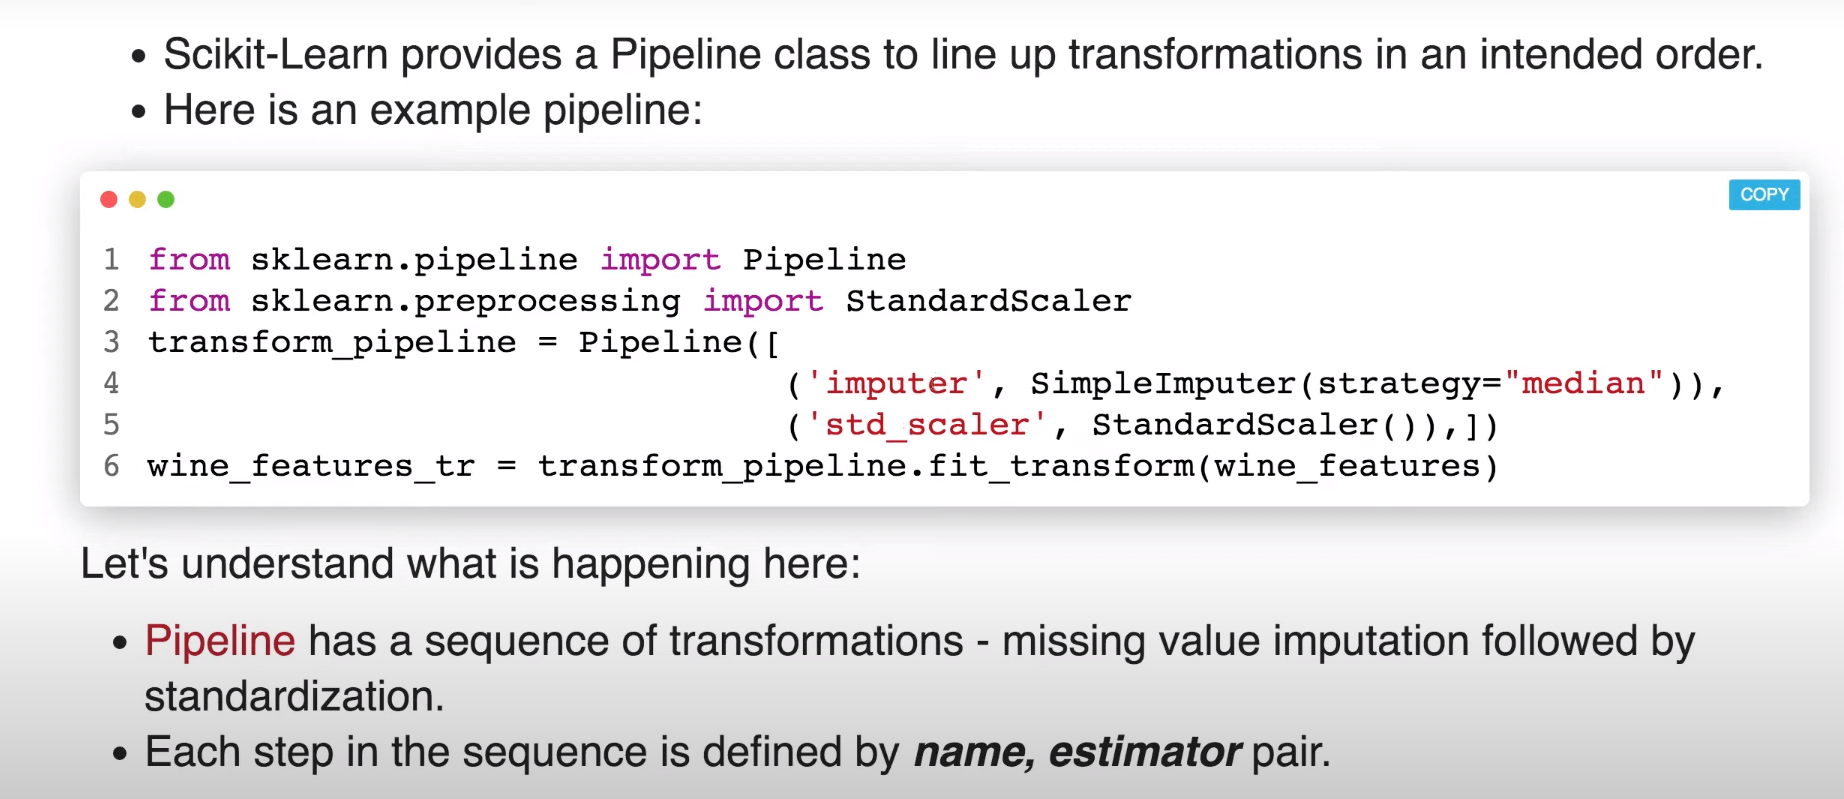

In [35]:
# how to transform mixed features
#we can use ColumnTranformer for this purpose

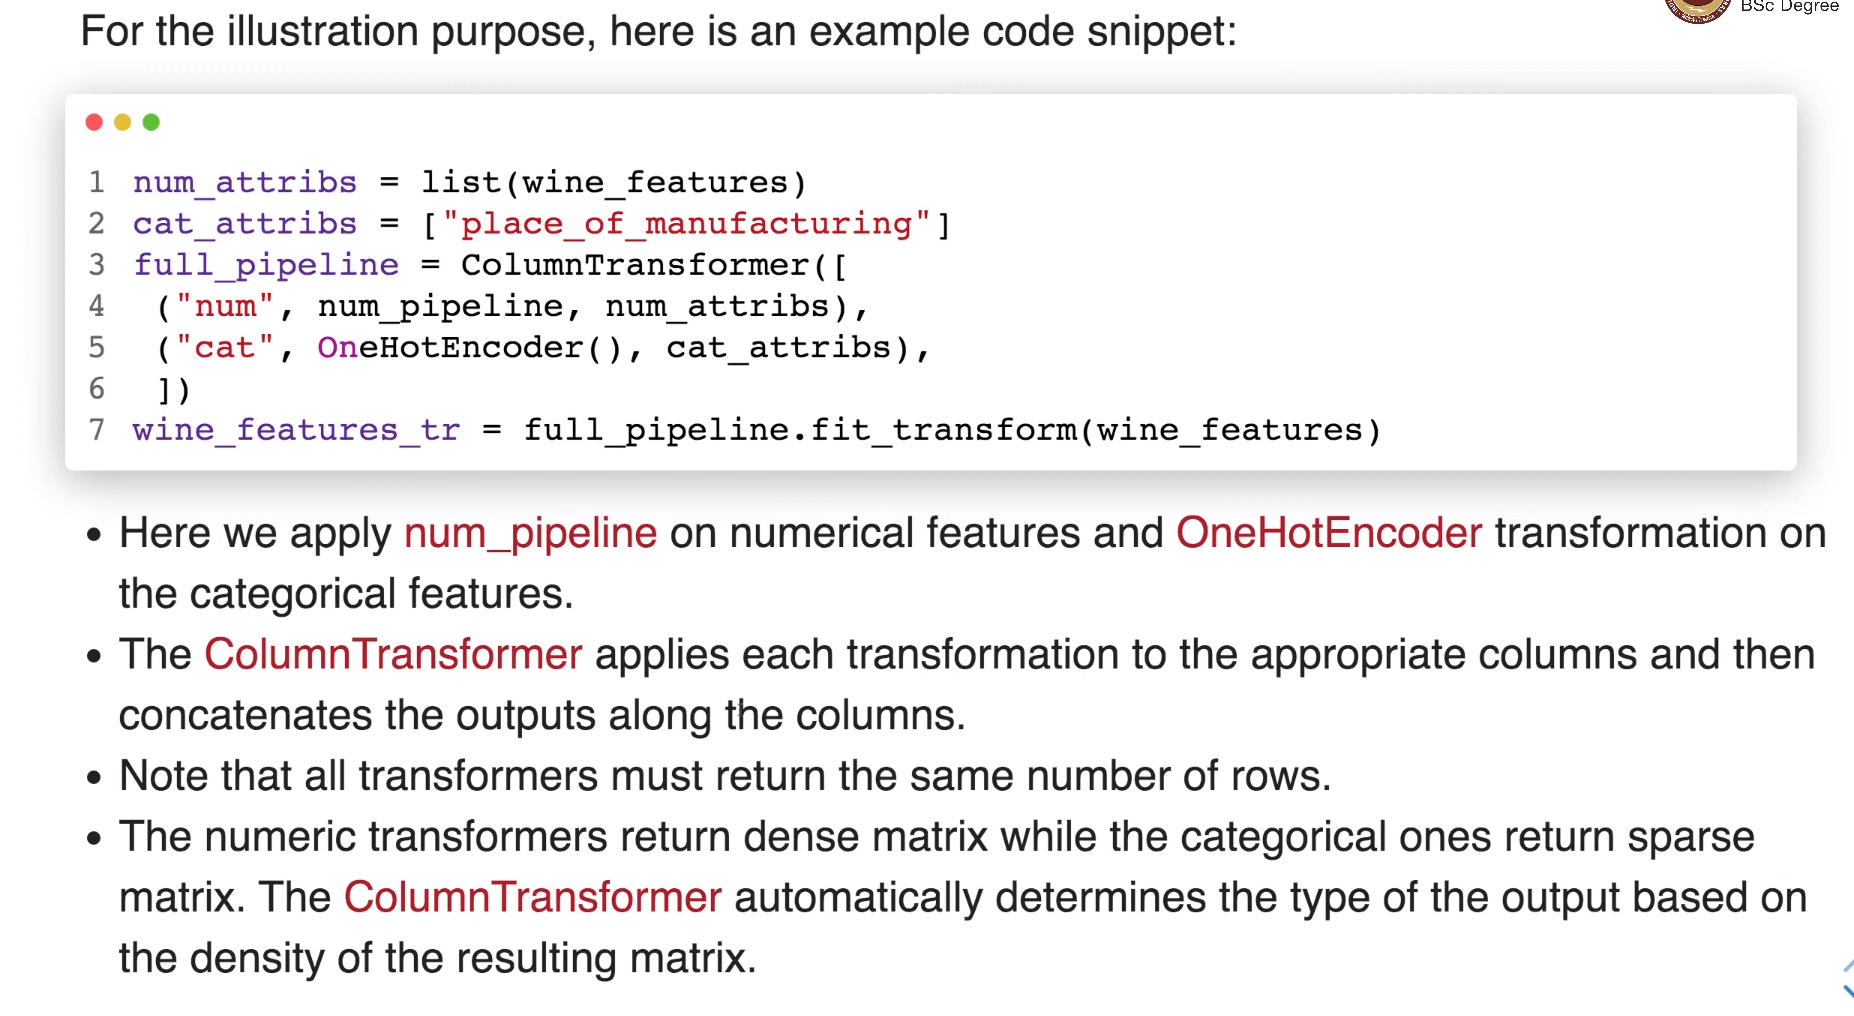

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values using median
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    # Add more transformations as needed
])
num_attribs = list(wine_features)
cat_attribs = ['place_of_manufacturing']
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs),
])
wine_features_tr = transform_pipeline.fit_transform(wine_features)


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr,wine_labels)

LinearRegression()

In [70]:
# to evaluate the performance in min squared error

from sklearn.metrics import mean_squared_error

quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels,quality_predictions)

0.4206571060060278

In [71]:


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),
                              ('std_scaler',StandardScaler()),])
wine_features_test = strat_test_set.drop('quality',axis=1)
wine_labels_test = strat_test_set['quality'].copy()
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

In [72]:
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test,quality_test_predictions)

0.39759130875015186

Text(0, 0.5, 'Predicted quality')

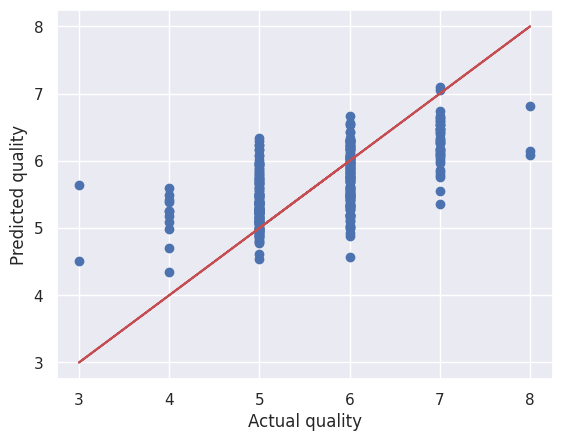

In [73]:
#lets visulaise it
plt.scatter(wine_labels_test,quality_test_predictions)
plt.plot(wine_labels_test,wine_labels_test,'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

In [74]:
# lets try for decision tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr,wine_labels)

DecisionTreeRegressor()

In [75]:
quality_predictions = tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels,quality_predictions)

0.0

In [77]:
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test,quality_test_predictions)

0.61875

In [78]:
# cross validation
from sklearn.model_selection import cross_val_score


In [79]:
#helper function to calulte cv scores for different folds
def display_scores(scores):
    print("scores: ", scores)
    print("Mean: ",scores.mean())
    print("Standard deviation : ", scores.std())

In [80]:
scores = cross_val_score(lin_reg,wine_features_tr,wine_labels,scoring='neg_mean_squared_error',cv=10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

# for different 10 folds we calculated mse and mean and sd

scores:  [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean:  0.431639217212196
Standard deviation :  0.0835635973041396


In [81]:
scores = cross_val_score(tree_reg,wine_features_tr,wine_labels,scoring='neg_mean_squared_error',cv=10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

# for different 10 folds we calculated mse and mean and sd same for d tree

scores:  [0.640625   0.734375   0.6328125  0.578125   0.4609375  0.59375
 0.640625   0.75       0.828125   1.03149606]
Mean:  0.6890871062992125
Standard deviation :  0.1495509217549436


In [82]:
# random forest regressor


from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr,wine_labels)

scores = cross_val_score(forest_reg,wine_features_tr,wine_labels,scoring='neg_mean_squared_error',cv=10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

scores:  [0.38627109 0.43676094 0.28729531 0.30905    0.22560781 0.2958875
 0.26439141 0.38860469 0.42914141 0.46466693]
Mean:  0.3487677085383858
Standard deviation :  0.07814681467471105


In [83]:
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test,quality_test_predictions)

0.33311531250000004

Text(0, 0.5, 'Predicted quality')

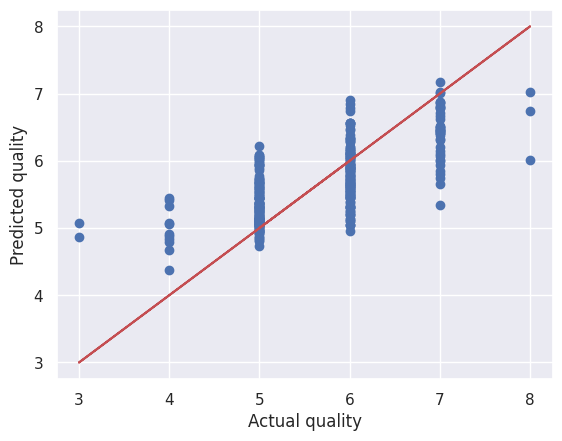

In [85]:
#lets visulaise it
plt.scatter(wine_labels_test,quality_test_predictions)
plt.plot(wine_labels_test,wine_labels_test,'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

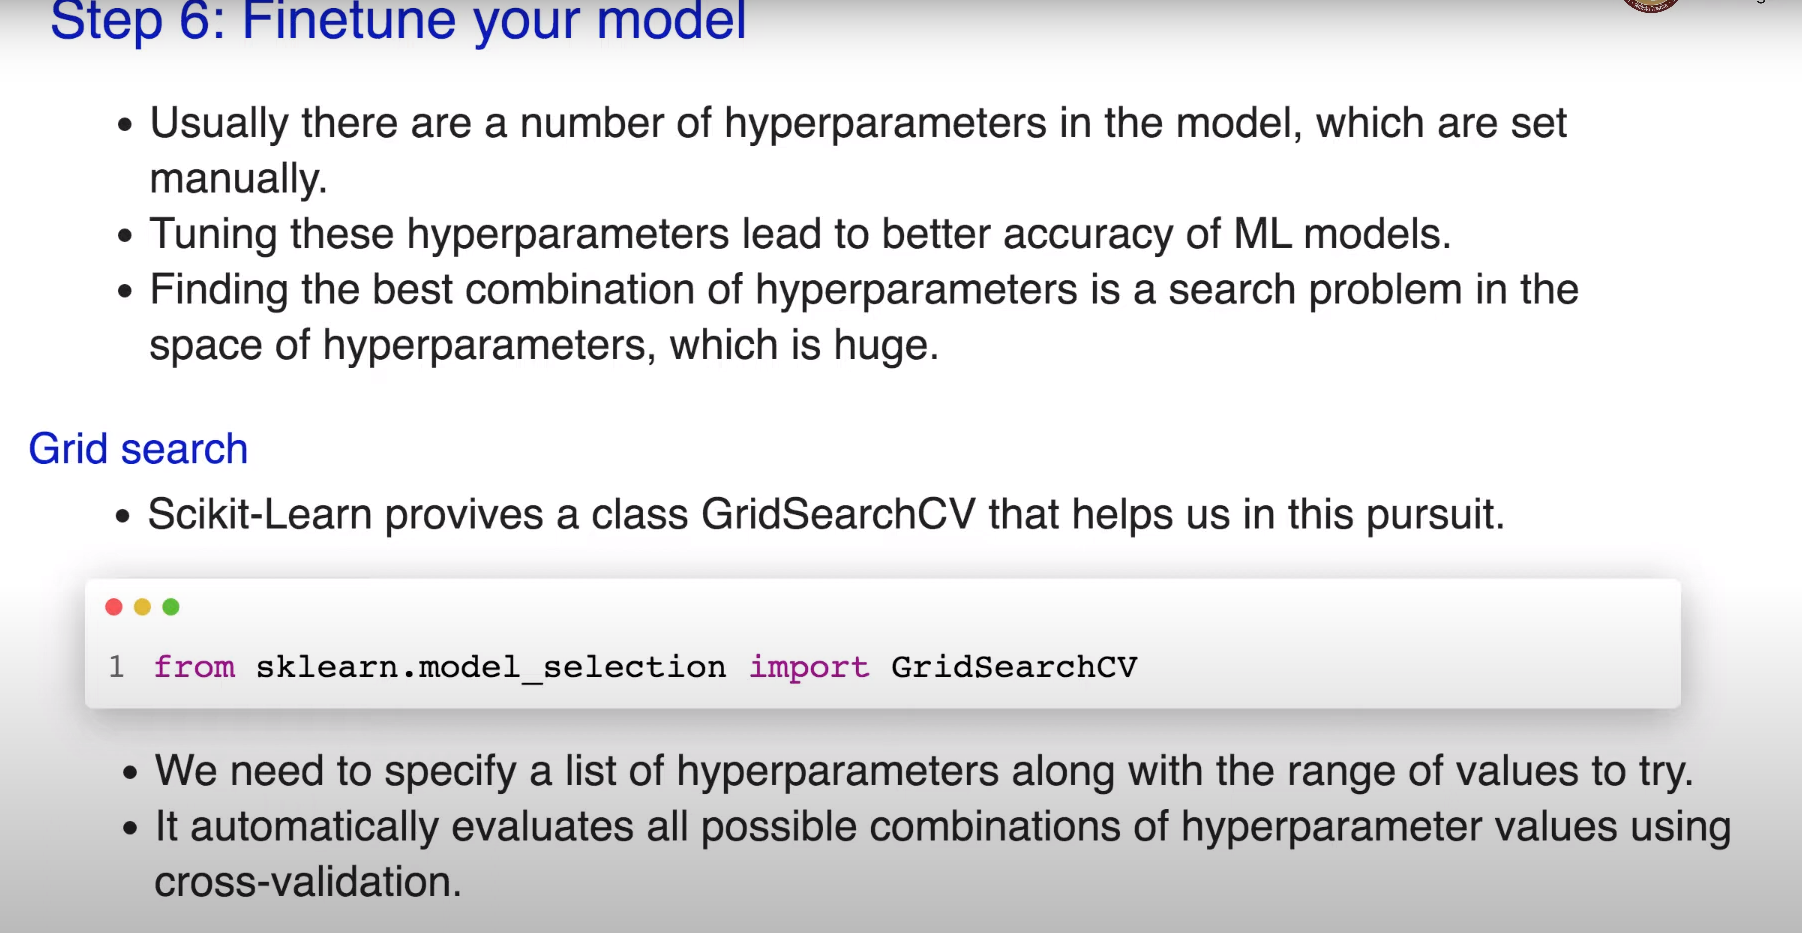

In [86]:
from sklearn.model_selection import GridSearchCV
# there ae many hp in Random forest regressor 
# number of estimators
# maximu number of features


In [87]:
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators':[3,10],'max_features':[2,3,4]},
]

In [89]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
# number of mpdel runs here 4*3*5 + 3*2*5 = 90 model training runs

grid_search.fit(wine_features_tr,wine_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [91]:
grid_search.best_params_ #gives best params


{'max_features': 4, 'n_estimators': 30}

In [92]:
# to see results
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres['params']):
    print(-mean_score,params)

0.482182734204793 {'max_features': 2, 'n_estimators': 3}
0.3873969056372549 {'max_features': 2, 'n_estimators': 10}
0.3653388854847494 {'max_features': 2, 'n_estimators': 30}
0.49524577886710236 {'max_features': 4, 'n_estimators': 3}
0.3788272365196078 {'max_features': 4, 'n_estimators': 10}
0.35441238766339866 {'max_features': 4, 'n_estimators': 30}
0.47656113834422653 {'max_features': 6, 'n_estimators': 3}
0.38926513480392155 {'max_features': 6, 'n_estimators': 10}
0.36138279888344227 {'max_features': 6, 'n_estimators': 30}
0.46761505991285396 {'max_features': 8, 'n_estimators': 3}
0.3915254901960784 {'max_features': 8, 'n_estimators': 10}
0.37078324822984754 {'max_features': 8, 'n_estimators': 30}
0.47876089324618737 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.37016182598039216 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4522423066448801 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.376217493872549 {'bootstrap': False, 'max_features'

In [93]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [94]:
# randomised search cv
# sometimes it is very difficult to do grid search
feature_importances = grid_search.best_estimator_.feature_importances_

In [95]:
sorted(zip(feature_importances,feature_list),reverse=True)

[(0.210813170351391, 'alcohol'),
 (0.13806942137162406, 'sulphates'),
 (0.12049746962063754, 'volatile acidity'),
 (0.09027957868460819, 'density'),
 (0.0868410254352166, 'total sulfur dioxide'),
 (0.06648108977560188, 'citric acid'),
 (0.06517402238163285, 'chlorides'),
 (0.05983388256958188, 'pH'),
 (0.059706992950664, 'fixed acidity'),
 (0.05461755248623344, 'residual sugar'),
 (0.047685794372808635, 'free sulfur dioxide')]

In [96]:
#based on the above we can drop some features which are not important
quality_test_predictions = grid_search.best_estimator_.predict(wine_features_test_tr)

In [97]:
mean_squared_error(wine_labels_test,quality_test_predictions)

0.36045486111111114

In [98]:
# good idea to get 95 % cI
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions-wine_labels_test)**2
stats.t.interval(confidence,len(squared_errors)-1,
                loc=squared_errors.mean(),
                scale=stats.sem(squared_errorsed_errors))

(0.2960380798904327, 0.4248716423317896)

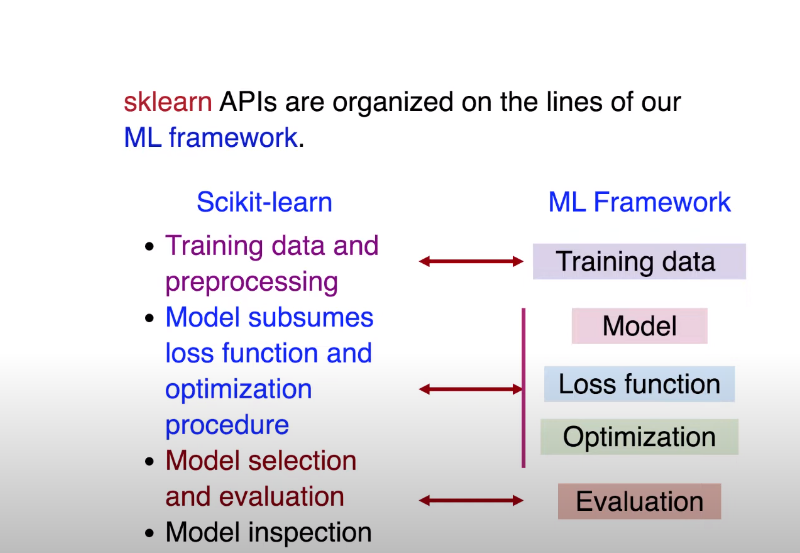



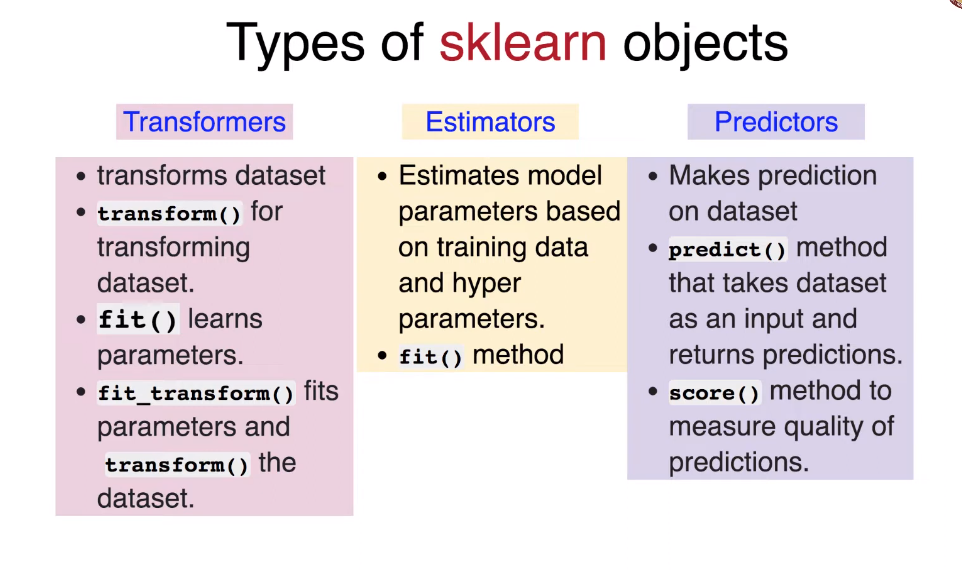